You work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

In [22]:
### YOUR CODE HERE ###

# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
### YOUR CODE HERE ###

df_original = pd.read_csv(r"E:\google\Invistico_Airline.csv")

In [24]:
### YOUR CODE HERE ###

df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


# Explore the data

In [25]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

In [26]:
df_original['satisfaction'].value_counts(dropna = False)
#To examine how many NaN values there are, set the `dropna` parameter passed in to this function to `False`.

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

# Check for missing values

In [27]:
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

 ***Should you remove rows where the `Arrival Delay in Minutes` column has missing values, even though the airline is more interested in the `inflight entertainment` column?***

For this activity, the airline is specifically interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. The `Arrival Delay in Minutes` column won't be included in the binomial logistic regression model; however, the airline might become interested in this column in the future.

For now, the missing values should be removed for two reasons:

* There are only 393 missing values out of the total of 129,880, so these are a small percentage of the total.
* This column might impact the relationship between entertainment and satisfaction.

In [28]:
# drop missing values from the rows, and drop the old index and create a new index based on the remaining rows

df_subset = df_original.dropna(axis=0).reset_index(drop = True)

# Prepare the data

If you want to create a plot (`sns.regplot`) of your model to visualize results later in the notebook, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object." 

Make the `Inflight entertainment` column "of type float." 

In [29]:
df_subset = df_subset.astype({"Inflight entertainment": float})

In [30]:
#Convert the categorical column `satisfaction` into numeric through one-hot encoding.

df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()

In [31]:
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


# Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.

In [32]:
X = df_subset[["Inflight entertainment"]]
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data. 

In [33]:
clf = LogisticRegression().fit(X_train,y_train)

# Obtain parameter estimates

In [34]:
print('Models coefficient is',clf.coef_)
print('Models intercept is',clf.intercept_)

Models coefficient is [[0.99751462]]
Models intercept is [-3.19355406]


Create a plot of your model

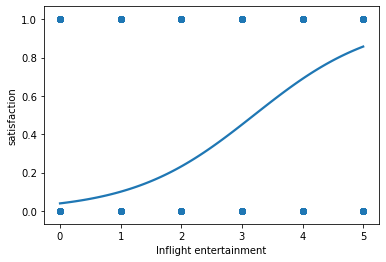

In [35]:
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df_subset, logistic=True, ci=None)

# Predict the outcome for the test dataset

In [36]:
y_pred = clf.predict(X_test)
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


# Use the `predict_proba` and `predict` functions on `X_test`

In [37]:
clf.predict_proba(X_test)

array([[0.14258068, 0.85741932],
       [0.55008402, 0.44991598],
       [0.89989329, 0.10010671],
       ...,
       [0.89989329, 0.10010671],
       [0.76826225, 0.23173775],
       [0.55008402, 0.44991598]])

In [38]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.801529
Precision: 0.816142
Recall: 0.821530
F1 Score: 0.818827


# Produce a confusion matrix

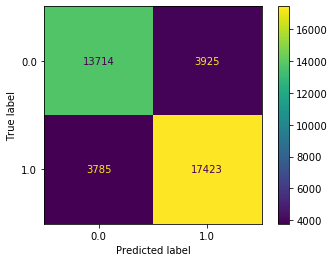

In [39]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

Two of the quadrants are under 4,000, which are relatively low numbers. Based on what we know from the data and interpreting the matrix, it's clear that these numbers relate to false positives and false negatives. 

Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.

Using more than a single independent variable in the model training process could improve model performance. This is because other variables, like `Departure Delay in Minutes,` seem like they could potentially influence customer satisfaction.

# Conclusion

*   Logistic regression accurately predicted satisfaction 80.2 percent of the time.  
*   The confusion matrix is useful, as it displays a similar amount of true positives and true negatives. 
*  Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. 
*  The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent. 
*  The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers. 